In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#load dataset
df = pd.read_csv(r"C:\Users\njang\Downloads\mock_fashion_data_uk_us.csv\mock_fashion_data_uk_us.csv")

In [18]:
#Check basic stats
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Product Name                  1000000 non-null  object 
 1   Price                         1000000 non-null  float64
 2   Brand                         1000000 non-null  object 
 3   Category                      1000000 non-null  object 
 4   Description                   1000000 non-null  object 
 5   Rating                        1000000 non-null  float64
 6   Review Count                  1000000 non-null  int64  
 7   Style Attributes              1000000 non-null  object 
 8   Total Sizes                   1000000 non-null  object 
 9   Available Sizes               1000000 non-null  object 
 10  Color                         1000000 non-null  object 
 11  Purchase History              1000000 non-null  object 
 12  Age                          

In [20]:
#Check for missing values
print(df.isnull().sum())

Product Name                    0
Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Available Sizes                 0
Color                           0
Purchase History                0
Age                             0
Fashion Magazines               0
Fashion Influencers             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
Social Media Comments           0
feedback                        0
dtype: int64


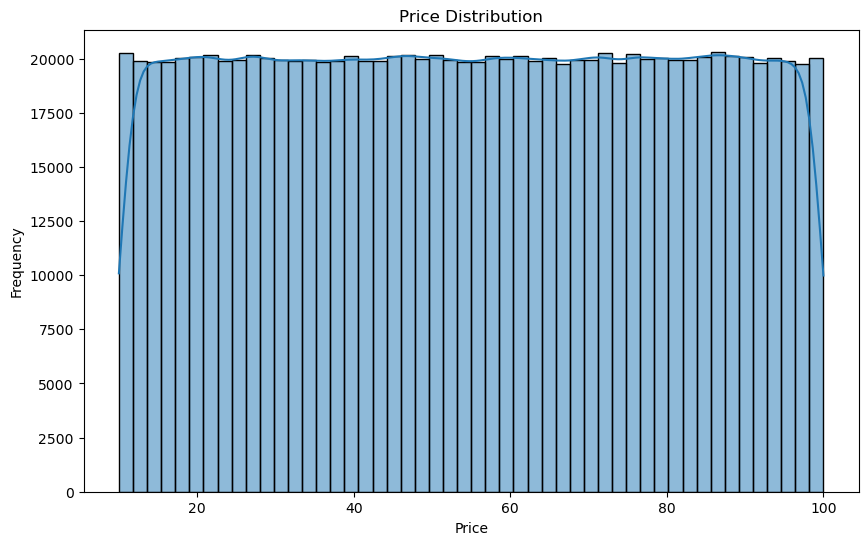

In [24]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

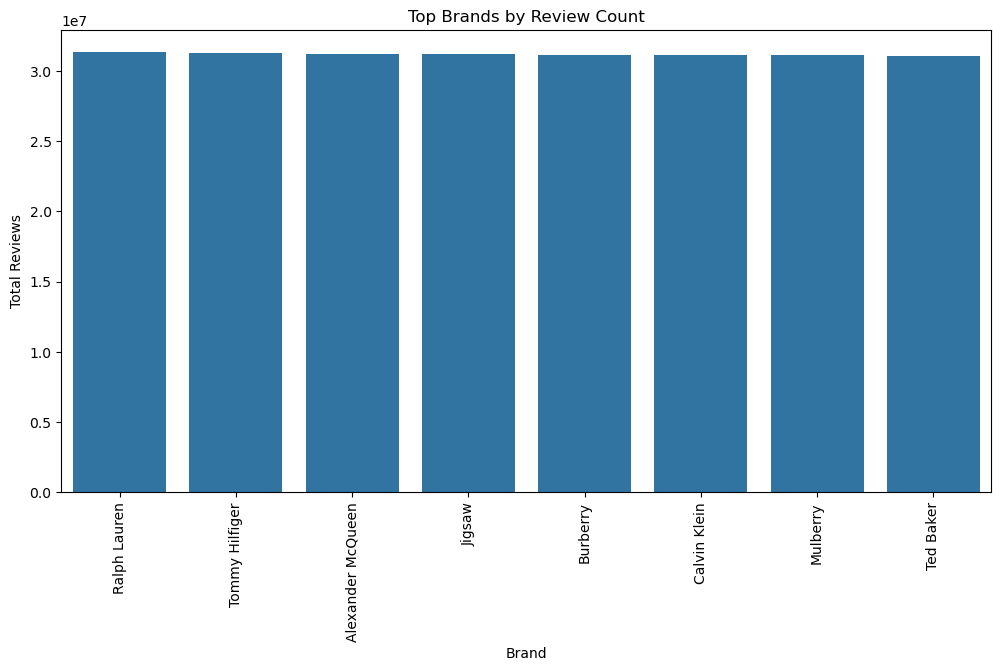

In [26]:
#Top brands by review count
plt.figure(figsize=(12, 6))
brand_review_count = df.groupby('Brand')['Review Count'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=brand_review_count.index, y=brand_review_count.values)
plt.title('Top Brands by Review Count')
plt.xlabel('Brand')
plt.ylabel('Total Reviews')
plt.xticks(rotation=90)
plt.show()


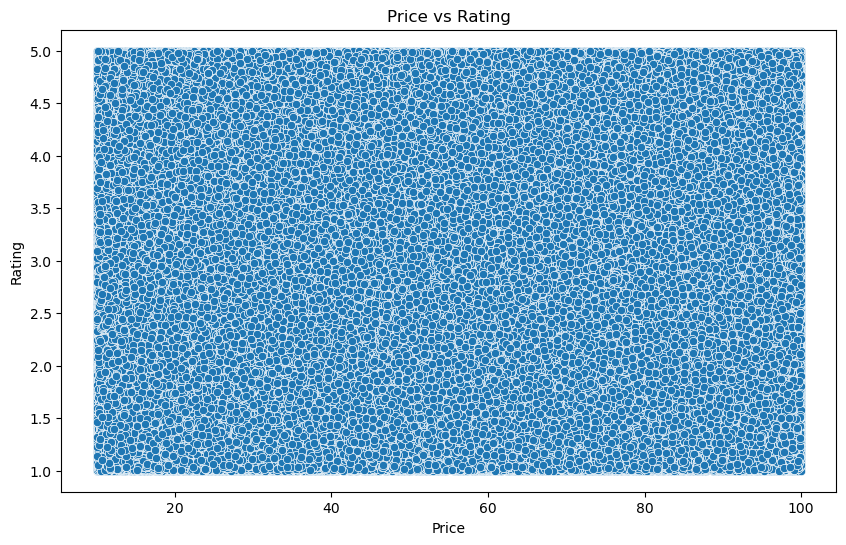

In [28]:
#Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


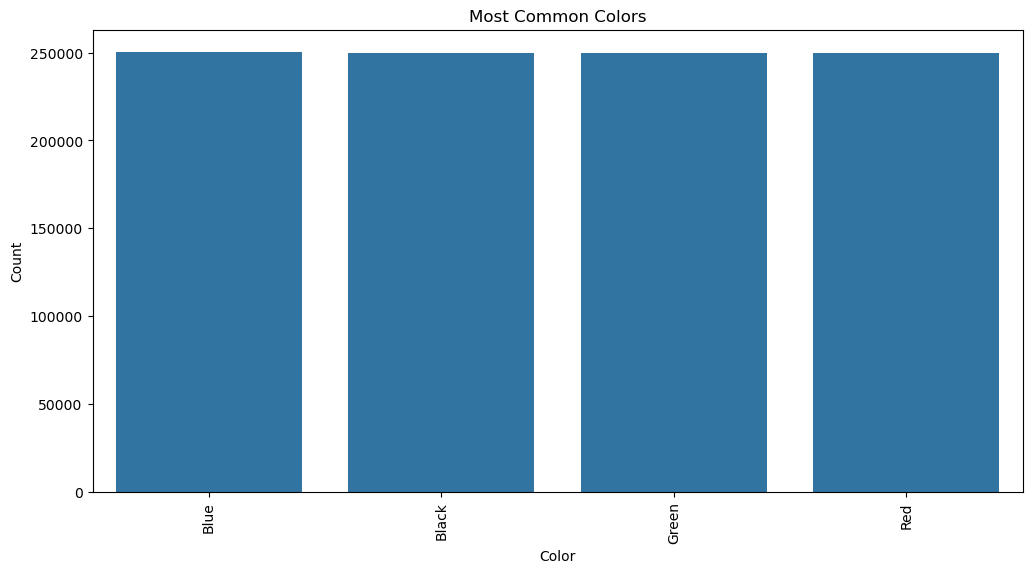

In [32]:
#Most common colors
plt.figure(figsize=(12, 6))
color_count = df['Color'].value_counts().head(10)
sns.barplot(x=color_count.index, y=color_count.values)
plt.title('Most Common Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


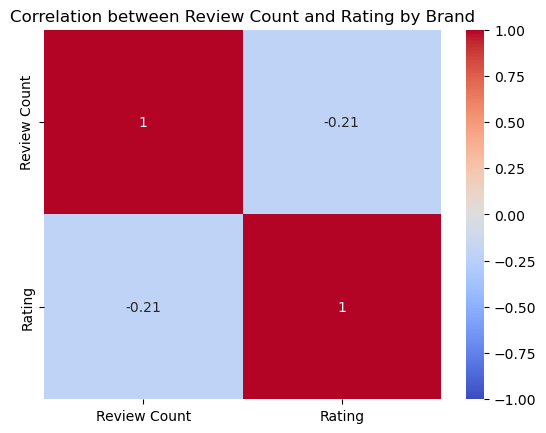

In [38]:
#Customer reviews by brand
review_data_numeric = review_data.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(review_data_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Review Count and Rating by Brand')
plt.show()



In [51]:
#Data Preprocessing(Handling missing values)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Color'] = df['Color'].fillna(df['Color'].mode()[0])


In [53]:
#Checking if there are still missing values
print(df.isnull().sum())


Product Name                    0
Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Available Sizes                 0
Color                           0
Purchase History                0
Age                             0
Fashion Magazines               0
Fashion Influencers             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
Social Media Comments           0
feedback                        0
dtype: int64


In [59]:
print(df.columns)

Index(['Product Name', 'Price', 'Brand', 'Category', 'Description', 'Rating',
       'Review Count', 'Style Attributes', 'Total Sizes', 'Available Sizes',
       'Color', 'Purchase History', 'Age', 'Fashion Magazines',
       'Fashion Influencers', 'Season', 'Time Period Highest Purchase',
       'Customer Reviews', 'Social Media Comments', 'feedback', 'season'],
      dtype='object')


In [61]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['season'] = le.fit_transform(df['Season'])  # Convert seasons into numbers
df = pd.get_dummies(df, columns=['Color'])  # One-hot encoding for colors


In [63]:
print(df['season'].unique())  


[1 5 4 2 3 0]


In [67]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)  
# Output should show something like: {'Autumn': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}


{'Fall': 0, 'Fall/Winter': 1, 'Spring': 2, 'Spring/Summer': 3, 'Summer': 4, 'Winter': 5}


In [71]:
#Normalizing features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Price', 'Age']] = scaler.fit_transform(df[['Price', 'Age']])


In [73]:
print(df[['Price', 'Age']].describe())


                Price             Age
count  1000000.000000  1000000.000000
mean         0.500017        0.500091
std          0.288665        0.294911
min          0.000000        0.000000
25%          0.249963        0.239130
50%          0.500084        0.500000
75%          0.750127        0.760870
max          1.000000        1.000000


In [75]:
print(df.head())


  Product Name     Price              Brand   Category Description    Rating  \
0         T5D3  0.972337       Ralph Lauren   Footwear         Bad  1.421706   
1         Y0V7  0.470460          Ted Baker       Tops    Not Good  1.037677   
2         N9Q4  0.060343             Jigsaw   Footwear    Very Bad  3.967106   
3         V2T6  0.790187  Alexander McQueen  Outerwear    Not Good  2.844659   
4         S7Y1  0.240374     Tommy Hilfiger    Bottoms   Very Good  1.183242   

   Review Count Style Attributes Total Sizes Available Sizes  ...  \
0           492       Streetwear    M, L, XL              XL  ...   
1            57          Vintage    M, L, XL              XL  ...   
2           197       Streetwear     S, M, L               M  ...   
3           473           Formal     S, M, L               L  ...   
4            55           Sporty    M, L, XL               S  ...   

        Season  Time Period Highest Purchase Customer Reviews  \
0  Fall/Winter                       Da

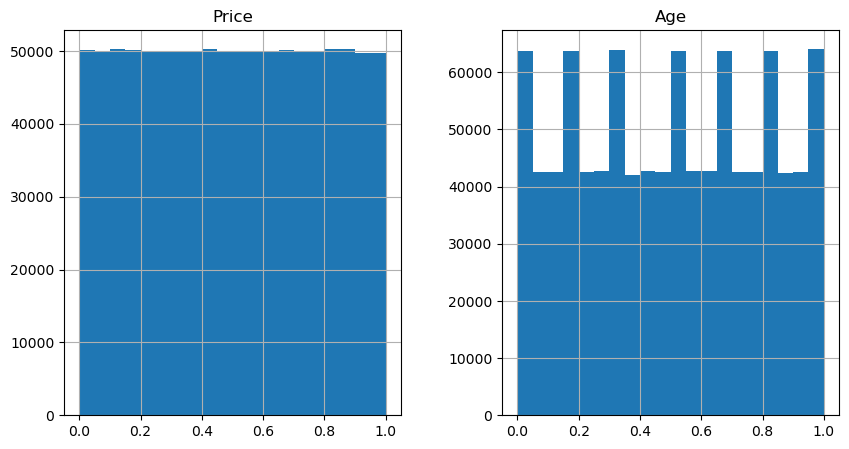

In [79]:
#Visualizing the distribution
import matplotlib.pyplot as plt

df[['Price', 'Age']].hist(figsize=(10, 5), bins=20)
plt.show()
